In [10]:
import numpy as np
import pandas as pd
from funmap import FUNMAP
from funmap import Manhattan_plot

In [11]:
np.set_printoptions(threshold=1e8)

In [12]:
z = pd.read_csv("data/zscore.txt", header=None, sep='\t')
z.head(5)

,0,1
0,rs1124048,-0.728700
1,rs10494829,-0.772893
2,rs4915210,2.747186
3,rs3198583,2.704427
4,rs56368827,-0.916975


In [13]:
R = pd.read_csv('data/ld.txt', sep='\s+', header=None)
R.iloc[:5, :5]

,0,1,2,3,4
0,1.000000,0.998869,-0.267510,-0.263831,0.995418
1,0.998869,1.000000,-0.267259,-0.263581,0.996549
2,-0.267510,-0.267259,1.000000,0.980754,-0.266515
3,-0.263831,-0.263581,0.980754,1.000000,-0.262524
4,0.995418,0.996549,-0.266515,-0.262524,1.000000


In [14]:
A = pd.read_csv("data/anno.txt", sep='\t')
A.head(5)

,SNP,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,rs1124048,-1.015009,-0.397398,-0.861189,-0.665162,-0.458874,0.770120,-0.700742,-1.229707,-0.660256,...,0.498786,-0.342370,-0.958272,-0.112156,0.583964,-0.167801,0.961731,-0.202662,-1.092287,-2.095381
1,rs10494829,-0.079637,0.950920,-0.286397,0.069134,0.080210,-1.822247,-0.752357,-0.141860,0.601044,...,-1.155107,-1.577163,-0.600411,-1.731071,0.044429,-0.158960,0.046327,-0.498551,0.298087,-0.997278
2,rs4915210,-0.232987,-1.158921,-0.760091,-0.781941,-1.690010,1.200017,-1.055643,0.339705,0.548992,...,-1.856934,-1.504893,-0.662019,0.937614,-0.789089,-1.062347,1.167795,-1.223538,0.892665,-1.790346
3,rs3198583,-0.817268,-0.409896,0.464726,-0.736458,-0.820459,0.358393,-1.738217,-0.045861,0.240303,...,-2.382487,-0.778854,-0.590114,0.351036,-0.736047,-0.364375,1.075612,-0.189502,0.927523,1.030756
4,rs56368827,0.772091,-0.729730,-0.956874,1.299890,-0.717551,-0.754523,-1.502169,0.446605,-0.012163,...,0.534256,-1.567050,1.133041,-0.624416,0.602411,-1.079723,-0.497484,0.362869,-1.055744,0.293451


In [15]:
R = R.values
A = A.values[:, 1:].astype(float)
snp_name = z.values[:, 0]
z = z.values[:, 1]

In [16]:
result = FUNMAP(z, R, A, n=50000, L=10)

ELBO = -70861.72186298986 Diff = inf
ELBO = -70861.72091093283 Diff = 0.0009520570310996845
Stage1 finished, iterations=1
ELBO = -71280.82312055456 Diff = inf
ELBO = -71098.77890981466 Diff = 182.04421073989943
ELBO = -71039.13600476488 Diff = 59.64290504978271
ELBO = -71009.74572185526 Diff = 29.39028290961869
ELBO = -70992.60411909364 Diff = 17.14160276162147
ELBO = -70981.42425985096 Diff = 11.179859242678504
ELBO = -70973.58662066094 Diff = 7.837639190023765
ELBO = -70967.8131650069 Diff = 5.773455654038116
ELBO = -70963.40096931263 Diff = 4.41219569426903
ELBO = -70959.92911537772 Diff = 3.4718539349123603
Stage2 finished, iterations=9
ELBO = -70957.12958390363 Diff = inf
ELBO = -70954.82357098797 Diff = 2.306012915665633
Stage3 finished, iterations=1


In [17]:
s_result = pd.DataFrame({'SNP': snp_name, 'PIP': result.pip})
s_result.to_csv('result/PIP.csv', header=None, index=False)

In [18]:
file = open('result/sets.txt', "w")
file.write(str(result.sets))
file.close()

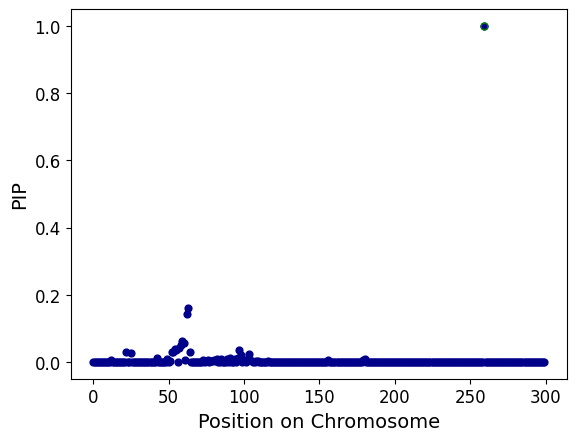

In [19]:
Manhattan_plot(PIP=result.pip, sets=result.sets['cs'], pos=None)